# COMP377: AI for Software Developers
## Assignment 4: Convolutional Neural Networks
### Exercise 2

Name: Wenjie Zhou

Student ID: 301337168

Date: November 21, 2024

File Name: WenjieZhou_COMP377Lab4_Ex2

### Instructions

1.  Complete the code in the cells provided according to the instructions given in the comments.
2.  Ensure that your code runs without errors.
3.  Submit your completed notebook via eCentennial.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import random

### Part 1: Data Loading

In [2]:
## Part 1: Data Loading ##

# Load the CIFAR-10 dataset from Keras API
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class labels for CIFAR-10 dataset
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Part 2: Data Preprocessing

In [3]:
## Part 2: Data Pre-processing ##

# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Part 3: Create and Train Model

In [4]:
## Part 3: Model Training ###

# Define CNN model with 4 Convolutional Layers (2 blocks), 2 Max Pooling Layers, 3 Dropout Layers, 1 Flatten Layer, 1 Dense Layer, and 1 Output Layer
# Use ReLU activation for Convolutional and Dense Layers, Softmax activation for Output Layer
def build_model():
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten, dense, and output layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the model
model = build_model()

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback with patience of 5
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model and capture the training history with early stopping
# Use batch size of 64, 50 epochs, and 10% validation split
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.3124 - loss: 1.8416 - val_accuracy: 0.5692 - val_loss: 1.2392
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.5417 - loss: 1.2712 - val_accuracy: 0.6444 - val_loss: 1.0140
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.6149 - loss: 1.0713 - val_accuracy: 0.6800 - val_loss: 0.9108
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.6570 - loss: 0.9618 - val_accuracy: 0.7048 - val_loss: 0.8423
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.6926 - loss: 0.8675 - val_accuracy: 0.7404 - val_loss: 0.7628
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7163 - loss: 0.8097 - val_accuracy: 0.7426 - val_loss: 0.7610
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7299 - loss: 0.7619 - val_accuracy: 0.7554 - val_loss: 0.7233
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7437 - loss: 0.7252 - 

### Part 4: Test Model

In [5]:
### Part 4: Model Evaluation ###

# Make predictions on the test set
y_pred_raw = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_raw, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


### Part 5: Calculate Accuracy & Accuracy

In [6]:
### Part 5: Model Accuracy ###

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_raw, multi_class='ovr')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.78
ROC AUC: 0.97


### Visualization and Display (Optional)

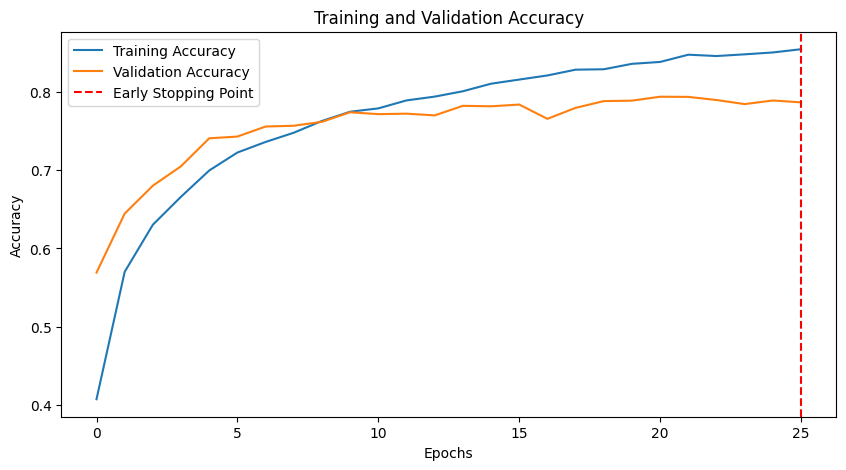

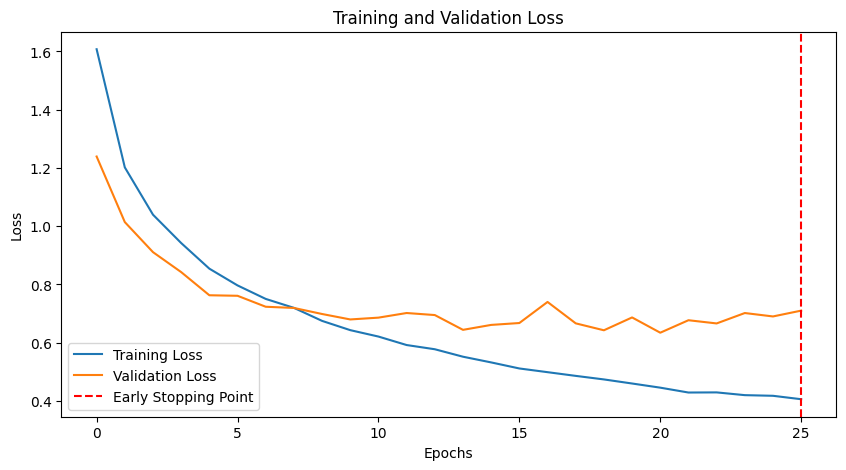

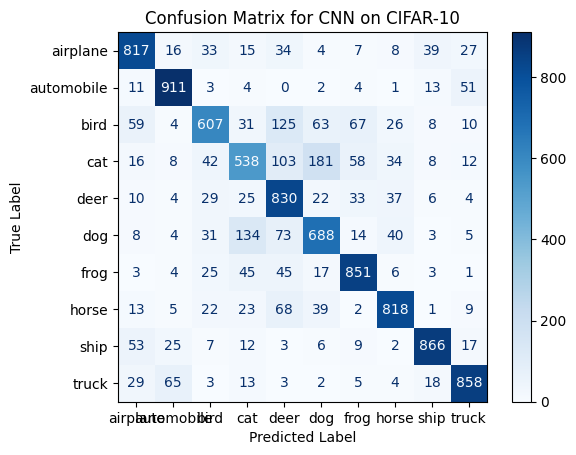

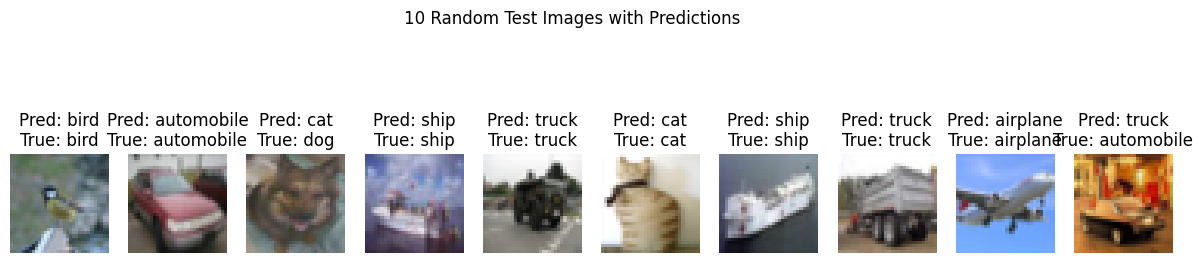

In [7]:
### Visualization & Display ###

## Print Results to the Screen ###

# Learning Curves
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(early_stopping.stopped_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(early_stopping.stopped_epoch, color='r', linestyle='--', label='Early Stopping Point')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
# Display performance of the model in terms of true positives, false positives, true negatives, and false negatives.
cm = confusion_matrix(y_true_labels, y_pred_labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for CNN on CIFAR-10')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Sample Predictions
# Display 10 random test images with their true and predicted labels
num_samples = 10
sample_indices = np.random.choice(X_test.shape[0], num_samples, replace=False)
plt.figure(figsize=(15, 4))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_pred_labels[idx]]}\nTrue: {class_names[y_true_labels[idx]]}")
plt.suptitle('10 Random Test Images with Predictions')
plt.show()

### Summary and Conclusions

CNN
- Accuracy: 0.78
- Precision: 0.78
- Recall: 0.78
- F1 Score: 0.78
- ROC AUC: 0.97

Due to an issue with the Nvidia CUDA and TensorFlow connection, the CNN model is running on my laptop's 16 Cores CPU, which limits processing speed. As a result, the model's complexity had to be reduced to avoid long training times and memory issues. This simplification may impact the model's performance, as it can't leverage the GPU for faster, more complex computations.

The CNN model for CIFAR-10 demonstrates solid performance with an accuracy, precision, recall, and F1 score of 0.78, suggesting that the model effectively balances correct classifications across different classes. The ROC AUC of 0.97 is particularly noteworthy, indicating strong capability in distinguishing between the various categories. While the model performs well overall, there is room for improvement in handling some misclassifications, as evidenced by the scores being slightly lower than perfect.

Potential improvements could include optimizing the model's architecture by incorporating more convolutional layers or leveraging deeper architectures such as ResNet or VGG to capture more intricate features. Further exploration of data augmentation techniques could help improve generalization by increasing the variability in the training data. Additionally, experimenting with different learning rates, optimizers like Adam with adaptive learning rates, or regularization methods such as batch normalization or weight decay may enhance performance. Hyperparameter tuning, including adjustments to batch size, epoch count, or implementing learning rate schedulers, could also contribute to boosting the model's accuracy and efficiency.